# Streaming Audience Analysis 

by Leon Chan

## 1. What did you do to assess the data before starting the task?

Assess the data quality by checking: 
- Duplicates in the audience id column (primary key - used to join datasets). 
- Unique values in the categorical column for anomalies or mis-spelt categorical entries. 
- Null values. There were only null values in the age and gender columns. 
- Consistency of the data types across the different tables. 

jupyter nbconvert Streaming_Audience_Analysis.ipynb --to slides --TemplateExporter.exclude_input=True --post serve

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

**Load Data**

In [7]:
all_data = pd.read_csv("data_all.csv") # the three datasets all joined together using the VLOOKUP in Excel. 
df = all_data.copy() # Make a copy of the original dataset so it isn't affected when manipulation is performed. 
df['minutes_streamed'] = df['seconds_streamed'].apply(lambda x: x/60)
df.fillna('NA', inplace = True)
df.head()

,audience_id,age,gender,frequency_segment,distinct networks,distinct programmes,seconds_streamed,minutes_streamed
0,0rXbd5CkFN06eJZtKcU9hDfALXO-n8wTMkd3RUFKiq4,35+,female,B. 2-5 days per week,1,3,16878,281.300000
1,3PPUU5XGP7tTQXF0CSHICUb0l5Do8I1-bCvwg7r1Wz0,16-34,female,F. less than monthly,1,2,287,4.783333
2,5dVZLJNLhNHuyh8tVen7SfT-UpZCqNo7E5vUew2BzkA,35+,male,E. monthly,1,2,29,0.483333
3,8Gm9T_MZSjmv_b3TY2NCnqQATEi3WnVhXaQKgiCyD-I,35+,male,E. monthly,2,3,10374,172.900000
4,0mRGP-hAbN4s3L7xAiEgP6BZK8dTBoCdvsf_6rGYpCo,35+,male,C. 1-2 days per week,3,5,2360,39.333333


In [14]:
def ordinal_create(df, var_list):
    """Helper function to convert variables encoded as categoricals which are
    actually ordinals. Uses a dictionary to remap, for example: 'F. less than monthly' to 1, 'E. monthly'
    to 2, etc. Accepts a DataFrame and a list of variables to remap. Returns a
    new DataFrame with edits applied. 
    Should be run after filling null values or columns with nulls come out as
    float instead of int"""
    
    qual_mapper = {'F. less than monthly': 1,
                  'E. monthly': 2,
                  'D. fortnightly': 3,
                  'C. 1-2 days per week': 4,
                  'B. 2-5 days per week': 5,
                  'A. daily (5+ days per week)': 6}

    update_df = df.copy()
    
    for variable in var_list:
        update_df[variable] = update_df[variable].replace(qual_mapper)

    return update_df

In [15]:
df_fs = ordinal_create(df, ['frequency_segment'])
# df['minutes_streamed'] = df['seconds_streamed'].apply(lambda x: x/60)
# df_.fillna('NA', inplace = True)
df_fs.head()

,audience_id,age,gender,frequency_segment,distinct networks,distinct programmes,seconds_streamed,minutes_streamed
0,0rXbd5CkFN06eJZtKcU9hDfALXO-n8wTMkd3RUFKiq4,35+,female,5,1,3,16878,281.300000
1,3PPUU5XGP7tTQXF0CSHICUb0l5Do8I1-bCvwg7r1Wz0,16-34,female,1,1,2,287,4.783333
2,5dVZLJNLhNHuyh8tVen7SfT-UpZCqNo7E5vUew2BzkA,35+,male,2,1,2,29,0.483333
3,8Gm9T_MZSjmv_b3TY2NCnqQATEi3WnVhXaQKgiCyD-I,35+,male,2,2,3,10374,172.900000
4,0mRGP-hAbN4s3L7xAiEgP6BZK8dTBoCdvsf_6rGYpCo,35+,male,4,3,5,2360,39.333333


In [16]:
df.duplicated('audience_id').sum()

0

In [17]:
# Check for anomlies in categorical columns. 

column_val_counts = ['age', 'gender']

for column in column_val_counts:
    print("---- %s ---" % column)
    print(df[column].value_counts())

---- age ---
35+         3099
16-34       1088
NA           789
Under 16      24
Name: age, dtype: int64
---- gender ---
male                 2239
female               1510
NA                    987
prefer not to say     242
other                  22
Name: gender, dtype: int64


In [18]:
df.isna().sum()

audience_id            0
age                    0
gender                 0
frequency_segment      0
distinct networks      0
distinct programmes    0
seconds_streamed       0
minutes_streamed       0
dtype: int64

In [19]:
# Checking data types and null values for each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   audience_id          5000 non-null   object 
 1   age                  5000 non-null   object 
 2   gender               5000 non-null   object 
 3   frequency_segment    5000 non-null   object 
 4   distinct networks    5000 non-null   int64  
 5   distinct programmes  5000 non-null   int64  
 6   seconds_streamed     5000 non-null   int64  
 7   minutes_streamed     5000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 312.6+ KB


In [20]:
df_fs.corr()

,frequency_segment,distinct networks,distinct programmes,seconds_streamed,minutes_streamed
frequency_segment,1.000000,0.475890,0.493722,0.479009,0.479009
distinct networks,0.475890,1.000000,0.671962,0.444236,0.444236
distinct programmes,0.493722,0.671962,1.000000,0.694092,0.694092
seconds_streamed,0.479009,0.444236,0.694092,1.000000,1.000000
minutes_streamed,0.479009,0.444236,0.694092,1.000000,1.000000


**Overview of the Dataset**

In [21]:
df.describe()

,distinct networks,distinct programmes,seconds_streamed,minutes_streamed
count,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,2.331600,9.164400,5.491845e+04,915.307437
std,2.214458,16.650358,1.273031e+05,2121.718813
min,1.000000,1.000000,3.000000e+00,0.050000
25%,1.000000,1.000000,1.599000e+03,26.650000
50%,1.000000,3.000000,9.493500e+03,158.225000
75%,3.000000,9.000000,4.605950e+04,767.658333
max,27.000000,232.000000,1.579728e+06,26328.800000


## 2. What did you find?

**Distribution of minutes streamed**

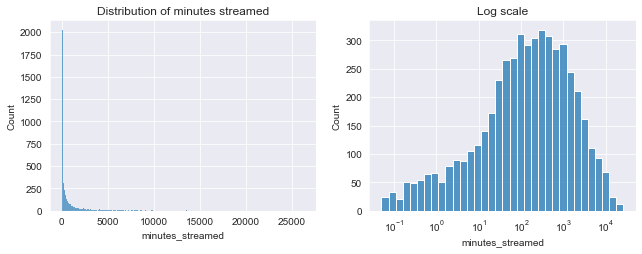

In [22]:
# hide_code_in_slideshow()

fig, axes = plt.subplots(1, 2, figsize = (10.5, 3.5))

sns.histplot(data = df, x = 'minutes_streamed', ax = axes[0])
axes[0].set_title('Distribution of minutes streamed')

sns.histplot(data = df, x = 'minutes_streamed', log_scale = True, ax = axes[1])
axes[1].set_title('Log scale')
plt.show()

In [23]:
len(df[df['minutes_streamed'] < 60])/len(df)

0.3554

- Large dispersion ranging from 3 seconds to over 18 days (1.58 million seconds) worth of content streamed. 
- Majority of the audience stream between 1 minute to 1,000 minutes. Peak count lies between the 10 minutes to 1000 minutes streamed range. 
- 35% of the audience have streamed 1 hour of content or less.
<!-- - 84% of the audience have streamed under 1 day worth of content or less.  -->
- Additional information required: What time frame does this dataset cover? 

**Distribution of age**

In [24]:
# hide_code_in_slideshow()

pc_age = df.groupby(by = 'age')['audience_id'].count().reset_index()
pc_age = pc_age.rename(columns = {'audience_id': 'count'})
pc_age['percentage'] = pc_age['count'].apply(lambda x: x*100/pc_age['count'].sum())
pc_age = pc_age.sort_values(by = 'percentage', ascending = False)
pc_age

,age,count,percentage
1,35+,3099,61.98
0,16-34,1088,21.76
2,NA,789,15.78
3,Under 16,24,0.48


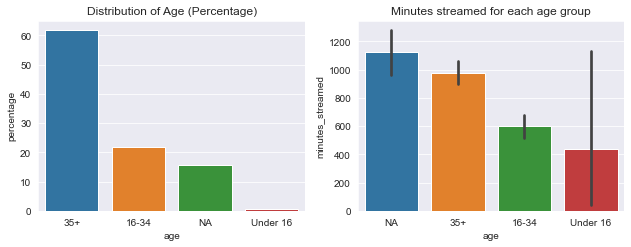

In [25]:
# hide_code_in_slideshow()

fig, axes = plt.subplots(1, 2, figsize = (10.5, 3.5))
x_pos = np.arange(len(df['age'].unique()))

sns.barplot(x = 'age', y = 'percentage', data = pc_age, ax = axes[0])
axes[0].set_title('Distribution of Age (Percentage)')
# axes[0].bar(x_pos, height = 2, color=['black', 'red', 'green', 'blue'])


order_age = df.groupby(by = 'age')['seconds_streamed'].mean().sort_values(ascending = False).index.values
sns.barplot(data = df, x= 'age', y = 'minutes_streamed', order = order_age , ax = axes[1])
axes[1].set_title('Minutes streamed for each age group')


plt.show()

Distribution of age:
- Under 16 category is a small minority of the total percentage.
- Over 35+ makes up the majority with over 60%, this could be impacted by the wide age range it covers. 

Minutes streamed for each age group:
- NA and 35+ age group streams the most number of minutes. 
- Followed by 16-34 age group with a significant drop off. 

**Distribution of gender**

In [26]:
pc_gender = df.groupby('gender')['audience_id'].count().reset_index()
pc_gender.rename(columns = {'audience_id': 'count'}, inplace = True)
pc_gender['percentage'] = pc_gender['count'].apply(lambda x: x*100/pc_gender['count'].sum())
pc_gender.sort_values(by = 'percentage', ascending = False, inplace = True)
pc_gender

,gender,count,percentage
2,male,2239,44.78
1,female,1510,30.20
0,NA,987,19.74
4,prefer not to say,242,4.84
3,other,22,0.44


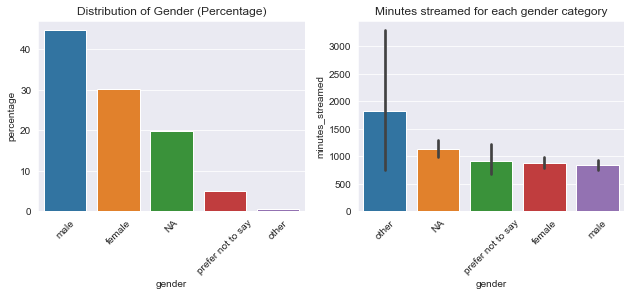

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (10.5, 3.5))

sns.barplot(x = 'gender', y = 'percentage', data = pc_gender, ax = axes[0])
axes[0].set_title('Distribution of Gender (Percentage)')
axes[0].tick_params('x', labelrotation = 45)

order_gender = df.groupby(by = 'gender')['minutes_streamed'].mean().sort_values(ascending = False).index.values
sns.barplot(data = df, x= 'gender', y = 'minutes_streamed', order = order_gender)
axes[1].set_title('Minutes streamed for each gender category')
axes[1].tick_params('x', labelrotation = 45)

plt.show()

Distribution of gender:
- Large male audience (\~45%) compared with female audience (\~30%). 
- Under 10% of the audience are in the 'other' or 'prefer not to say' category.

Minutes streamed for each gender category:
- Not enough data points for 'other' category resulting in a large error bar. 
- NA category with one of the most minutes streamed. 
- Minutes streamed for male and female are relatively even. 

**Viewing habits between age groups and gender groups**

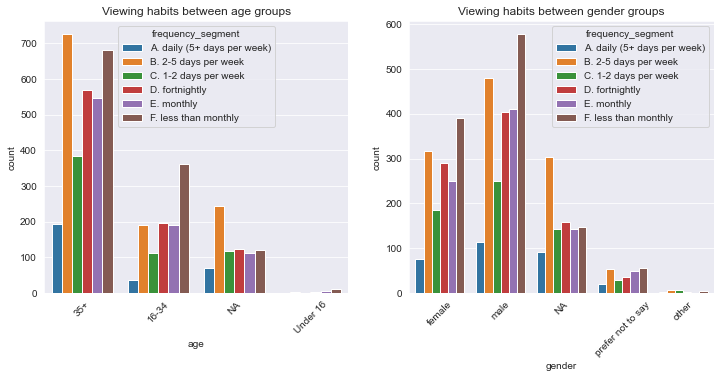

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

order_fs = df.groupby(by = 'frequency_segment')['minutes_streamed'].mean().sort_values(ascending = False).index.values
sns.countplot(data = df, x = 'age', hue = 'frequency_segment', hue_order = order_fs, ax = axes[0])
axes[0].set_title('Viewing habits between age groups')
axes[0].tick_params('x', labelrotation = 45)

sns.countplot(data = df, x = 'gender', hue = 'frequency_segment', hue_order = order_fs, ax = axes[1])
axes[1].set_title('Viewing habits between gender groups')
axes[1].tick_params('x', labelrotation = 45)

plt.show()

Viewing habits between age groups:
- One notable difference in viewing habits between the two most common age groups (35+ and 16-34) is the 2-5 days per week frequency segment.
<!-- - 2-5 days per week most common segment in the 35+ age group, whereas less than monthly is the most common in the 16-34 age group.  -->

Viewing habits between genders:
- Viewing habits relatively consistent between gender groups. 

**Distribution of frequency segment**

In [31]:
pc_fs = df.groupby(by = 'frequency_segment')['audience_id'].count().reset_index()
pc_fs.rename(columns = {'audience_id': 'count'}, inplace = True)
pc_fs['percentage'] = pc_fs['count'].apply(lambda x: x*100/pc_fs['count'].sum())
pc_fs

,frequency_segment,count,percentage
0,A. daily (5+ days per week),302,6.04
1,B. 2-5 days per week,1161,23.22
2,C. 1-2 days per week,615,12.30
3,D. fortnightly,892,17.84
4,E. monthly,855,17.10
5,F. less than monthly,1175,23.50


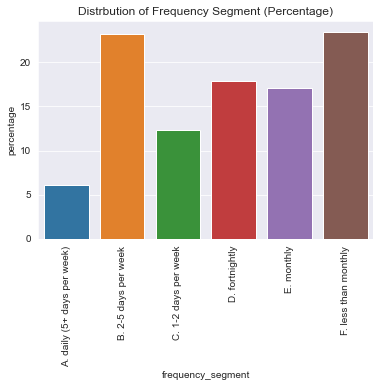

In [32]:
sns.barplot(x = 'frequency_segment', y = 'percentage', data = pc_fs, order = order_fs)
plt.xticks(rotation = 'vertical')
plt.title('Distrbution of Frequency Segment (Percentage)')
plt.show()

# fig, axes = plt.subplots(1, 2, figsize = (10.5, 3.5))

# sns.barplot(x = 'frequency_segment', y = 'percentage', data = pc_fs, order = order_fs, ax = axes[0])
# axes[0].set_title('Distribution of Frequency Segment (Percentage)')
# axes[0].tick_params('x', labelrotation = 90)

# sns.barplot(data = df, x = 'frequency_segment', y = 'minutes_streamed', order = order_fs)
# axes[1].set_title('Minutes streamed by frequency segment')
# axes[1].tick_params('x', labelrotation = 90)


# ['F. less than monthly',
#                   'E. monthly',
#                   'D. fortnightly',
#                   'C. 1-2 days per week',
#                   'B. 2-5 days per week',
#                   'A. daily (5+ days per week)']

Distribution of frequency segment
- The least common frequency segment is the daily (5+ days per week) with around 5%. 
- The segments which are 2 - 5 days per week and less than monthly are the most common, with around 25% of the audience falling into each segment. 

**Distinct networks and distinct programmes for each frequency segment**

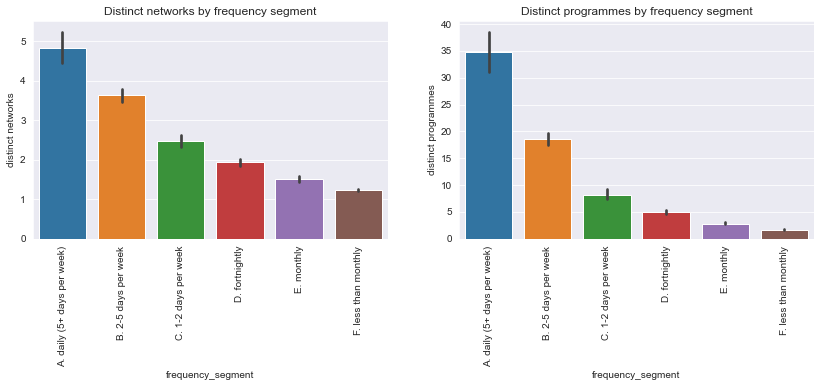

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))

# sns.barplot(data = df, x = 'frequency_segment', y = 'minutes_streamed', order = order_fs, ax = axes[0])
# axes[0].set_title('Minutes streamed by frequency segment')
# axes[0].tick_params('x', labelrotation = 90)

sns.barplot(data = df, x = 'frequency_segment', y = 'distinct networks', order = order_fs, ax = axes[0])
axes[0].set_title('Distinct networks by frequency segment')
axes[0].tick_params('x', labelrotation = 90)

sns.barplot(data = df, x = 'frequency_segment', y = 'distinct programmes', order = order_fs, ax = axes[1])
axes[1].set_title('Distinct programmes by frequency segment')
axes[1].tick_params('x', labelrotation = 90)


# plt.legend(['1. A'])
# plt.title('Minutes streamed by frequency segment')
# plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
print(df['distinct networks'].quantile(0.95))
print(df['distinct programmes'].quantile(0.95))

7.0
36.05000000000018


- The more frequent users are also more active. They tune into more distinct networks and programmes. 
- 95% of the audience tunes into 7 distinct networks or less. 
- 95% of the audience tunes into 36 programmes or less. 

def ordinal_create(df, var_list):

    """Helper function to convert variables encoded as categoricals which are
    actually ordinals. Uses a dictionary to remap, for example: 'F. less than monthly' to 1, 'E. monthly'
    to 2, etc. Accepts a DataFrame and a list of variables to remap. Returns a
    new DataFrame with edits applied. 
    Should be run after filling null values or columns with nulls come out as
    float instead of int"""
    
    qual_mapper = {'F. less than monthly': 1,
                  'E. monthly': 2,
                  'D. fortnightly': 3,
                  'C. 1-2 days per week': 4,
                  'B. 2-5 days per week': 5,
                  'A. daily (5+ days per week)': 6}

    for variable in var_list:
        update_df[variable] = update_df[variable].replace(qual_mapper)

    return update_df

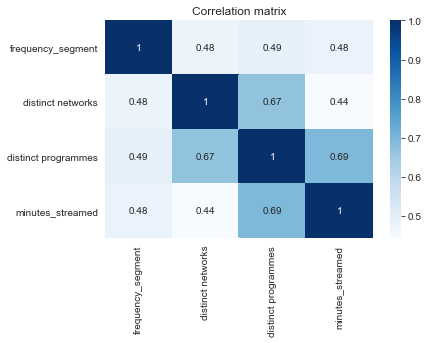

In [35]:
df_fs_corr = df_fs.drop(columns = 'seconds_streamed')
df_mx = df_fs_corr.corr()
df_mx

sns.heatmap(df_mx, annot = True, cmap = 'Blues')
plt.title('Correlation matrix')
plt.show()

- Moderate to strong positive correlation between number of distinct networks and programmes used by the users. 
- Moderate positive correlation between frequency segment and the number distinct networks, programmes and minutes streamed. 

## 3. What other data would you need for further analysis?

- actual ages or number of days streamed per month for analysis using linear regression. 
- dates and times to gain insight on listening activities and for trend analysis. 
- geographic data of the audience. 
- types of device used to stream our content. 
- session data. 
- programmes and network data: titles, categories and genres. 

# Thank You

# Rough workings

**Distinct Programmes**

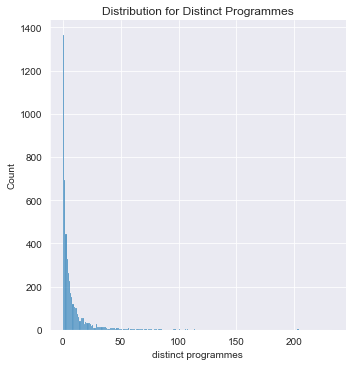

In [36]:
sns.displot(data = df, x = 'distinct programmes', kde = False, discrete = True)
plt.title('Distribution for Distinct Programmes')
plt.show()

<AxesSubplot:xlabel='distinct programmes', ylabel='Count'>

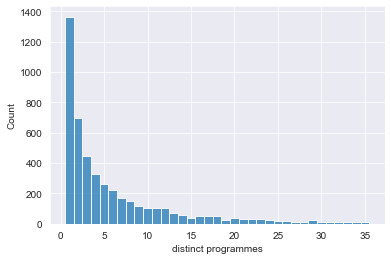

In [37]:
programmes_95 = df[df['distinct programmes'] <36]
# sns.displot(data = dp95, x = 'distinct programmes', aspect = 1.4)
sns.histplot(data = programmes_95, x = 'distinct programmes', discrete = True)

In [38]:
df['distinct programmes'].quantile(0.95)

36.05000000000018

- There is a large dispersion in the number of distinct programmes that the audience tunes into, ranging from 1 to over 232.
- 95% of the audience tunes into 36 programmes or less. 
-  Most common number of distinct programmes is 1, with a drop off for each additional distinct number of programmes generally speaking. 


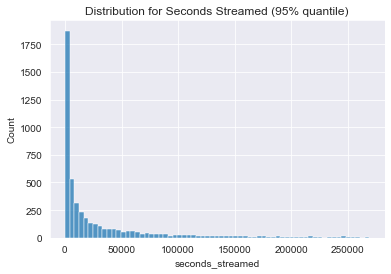

In [39]:
seconds_95 = df[df['seconds_streamed'] < 270000]

sns.histplot(data = seconds_95, x = 'seconds_streamed')
plt.title('Distribution for Seconds Streamed (95% quantile)')
plt.show()

In [40]:
df['minutes_streamed'].quantile(0.9)

2422.763333333334

In [41]:
len(df[df['minutes_streamed'] < 1000])/len(df)*100 # under an hour streamed
# len(df[df['minutes_streamed'] < 1440])/len(df)*100 

79.10000000000001

**age with hue  gender**

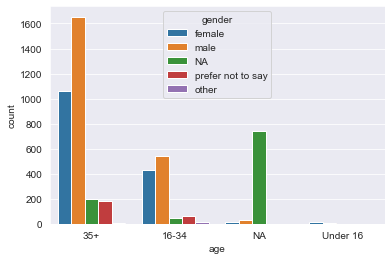

In [42]:
sns.countplot(data = df, x = 'age', hue = 'gender')
plt.show()

**age with hue frequency_segment**

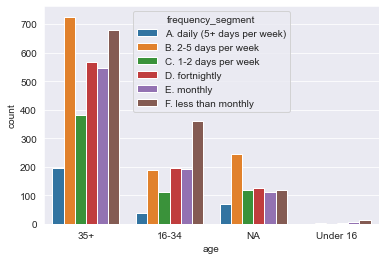

In [43]:
sns.countplot(data = df, x = 'age', hue = 'frequency_segment', hue_order = order_fs)
plt.show()

**gender with hue frequency_segment**

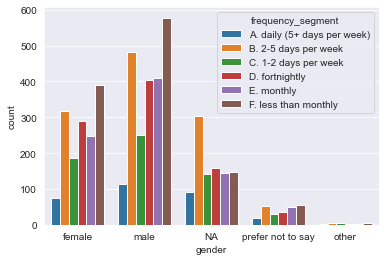

In [44]:
sns.countplot(data = df, x = 'gender', hue = 'frequency_segment', hue_order = order_fs)
plt.show()

**frequency_segment vs distinct networks, distinct programmes and minutes_streamed**

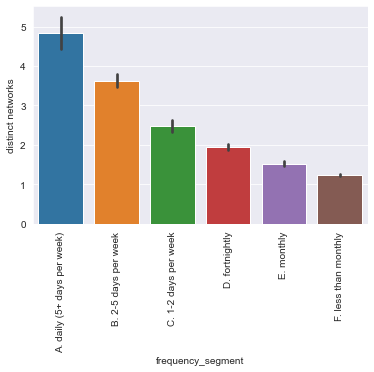

In [45]:
sns.barplot(data = df, x = 'frequency_segment', y = 'distinct networks', order = order_fs)
plt.xticks(rotation = 'vertical')
plt.show()